In [5]:
import numpy as np
import numpy.random as rd
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)

%matplotlib inline

#%config InlineBackend.figure_format='retina'


import mpl_toolkits.mplot3d.axes3d as p3
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.neighbors import kneighbors_graph

### 参考
* http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py

* http://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html#sphx-glr-auto-examples-manifold-plot-swissroll-py

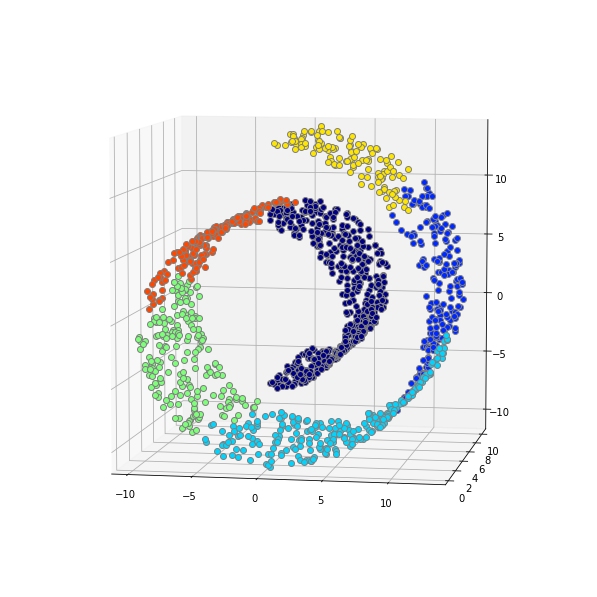

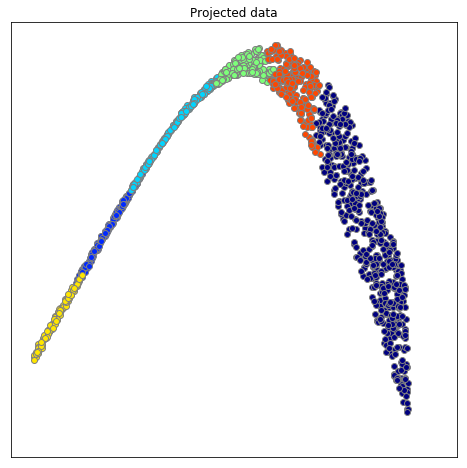

In [7]:
seed = 7

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise, random_state=seed)
# Make it thinner
X[:, 1] *= .5

conn = kneighbors_graph(X, n_neighbors=10, include_self=False)
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', connectivity=conn).fit(X)
label = ward.labels_

# 多様体学習による２次元化
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 1, 1)
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)), markeredgecolor='gray')   
plt.show()

fig = plt.figure(figsize=(8,8))
for l in np.unique(label):
    plt.scatter(X_r[label == l, 0], X_r[label == l, 1], c=plt.cm.jet(np.float(l) / np.max(label + 1)), edgecolors='gray')
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

 nframe=05

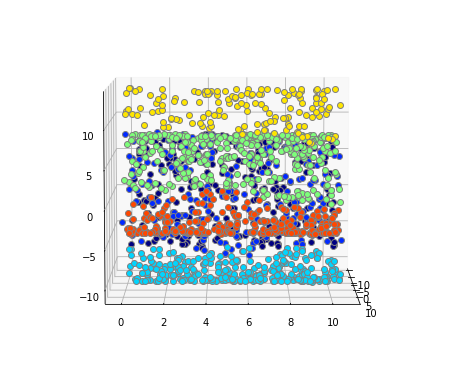

In [3]:
from matplotlib import animation as ani

seed = 6

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise, random_state=seed)
# Make it thinner
X[:, 1] *= .5

conn = kneighbors_graph(X, n_neighbors=10, include_self=False)
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', connectivity=conn).fit(X)
label = ward.labels_
    
def animate(nframe):
    print("\r nframe={}".format(nframe), end="")
    r = nframe*-10
    
    ax = fig.add_subplot(2, 1, 1)

    ax = p3.Axes3D(fig)
    ax.view_init(7, r)

    for l in np.unique(label):
        ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
                  'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)), markeredgecolor='gray')

num_frame = 36
fig = plt.figure(figsize=(6, 5))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))
anim.save('./img/swiss_roll2.gif', writer='imagemagick', fps=5, dpi=128)

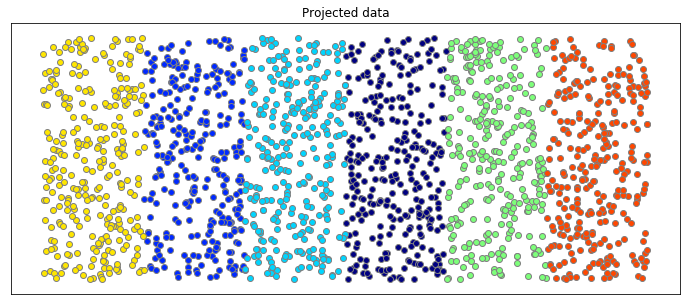

In [8]:
fig = plt.figure(figsize=(12,5))

for i, l in zip([3,1,2,4,0,5], np.unique(label)):
    #print(l)
    rv = rd.uniform(0, 1, size=(300, 2))
    rv[:, 0] = rv[:, 0] + i
    plt.scatter(rv[:, 0], rv[:, 1], 
                c=plt.cm.jet(np.float(l) / np.max(label + 1)), edgecolors='gray')
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()